In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q="

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | porto velho
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | namatanai
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | pesqueira
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | marcona

Processing Record 37 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 38 of Set 4 | antalaha
Processing Record 39 of Set 4 | haines junction
Processing Record 40 of Set 4 | tukrah
Processing Record 41 of Set 4 | hunchun
Processing Record 42 of Set 4 | methoni
Processing Record 43 of Set 4 | neryungri
Processing Record 44 of Set 4 | nadym
Processing Record 45 of Set 4 | kashan
Processing Record 46 of Set 4 | armidale
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | bagdarin
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | bogdanovich
Processing Record 2 of Set 5 | lakhnadon
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | half moon bay
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | haibowan
City not found. Skipping...
Proc

Processing Record 27 of Set 8 | ambovombe
Processing Record 28 of Set 8 | kyshtovka
Processing Record 29 of Set 8 | maniitsoq
Processing Record 30 of Set 8 | berbera
Processing Record 31 of Set 8 | kathu
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | anupgarh
Processing Record 34 of Set 8 | bitung
Processing Record 35 of Set 8 | cavalcante
Processing Record 36 of Set 8 | tahe
Processing Record 37 of Set 8 | manhattan
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | fukue
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | dourbali
Processing Record 42 of Set 8 | sheridan
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | chilakalurupet
Processing Record 45 of Set 8 | byron bay
Processing Record 46 of Set 8 | moth
Processing Record 47 of Set 8 | srandakan
Processing Record 48 of Set 8 | dergachi
Processing Record 49 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 50 of Set 8 

Processing Record 15 of Set 12 | troy
Processing Record 16 of Set 12 | kuusamo
Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | laurel
Processing Record 19 of Set 12 | jumla
Processing Record 20 of Set 12 | bay roberts
Processing Record 21 of Set 12 | monte cristi
City not found. Skipping...
Processing Record 22 of Set 12 | hirara
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | ust-tsilma
Processing Record 25 of Set 12 | reconquista
Processing Record 26 of Set 12 | bugama
Processing Record 27 of Set 12 | altamirano
Processing Record 28 of Set 12 | aykhal
Processing Record 29 of Set 12 | mehamn
Processing Record 30 of Set 12 | masvingo
Processing Record 31 of Set 12 | bathsheba
Processing Record 32 of Set 12 | egvekinot
Processing Record 33 of Set 12 | dryden
Processing Record 34 of Set 12 | tocopilla
Processing Record 35 of Set 12 | nouakchott
Processing Record 36 of Set 12 | alta floresta
Processing Record 37 of Set 12 | santa an

In [7]:
len(city_data)

559

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,51.22,92,44,6.91,AU,2022-04-25 19:40:10
1,Faanui,-16.4833,-151.7500,81.37,72,6,8.93,PF,2022-04-25 19:44:31
2,Hithadhoo,-0.6000,73.0833,83.48,75,69,6.98,MV,2022-04-25 19:44:31
3,College,64.8569,-147.8028,47.21,57,75,4.61,US,2022-04-25 19:44:32
4,Leningradskiy,69.3833,178.4167,11.17,94,64,8.10,RU,2022-04-25 19:44:32
5,Kloulklubed,7.0419,134.2556,75.70,80,100,16.75,PW,2022-04-25 19:44:33
6,Albany,42.6001,-73.9662,70.23,37,100,5.01,US,2022-04-25 19:43:59
7,Bengkulu,-3.8004,102.2655,76.21,88,100,7.58,ID,2022-04-25 19:44:33
8,Ilulissat,69.2167,-51.1000,28.42,80,100,0.00,GL,2022-04-25 19:44:34
9,Jamestown,42.0970,-79.2353,80.24,44,40,13.80,US,2022-04-25 19:44:34


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-04-25 19:40:10,-42.8794,147.3294,51.22,92,44,6.91
1,Faanui,PF,2022-04-25 19:44:31,-16.4833,-151.7500,81.37,72,6,8.93
2,Hithadhoo,MV,2022-04-25 19:44:31,-0.6000,73.0833,83.48,75,69,6.98
3,College,US,2022-04-25 19:44:32,64.8569,-147.8028,47.21,57,75,4.61
4,Leningradskiy,RU,2022-04-25 19:44:32,69.3833,178.4167,11.17,94,64,8.10
...,...,...,...,...,...,...,...,...,...
554,Nanchong,CN,2022-04-25 19:59:49,30.7951,106.0847,68.63,69,100,5.08
555,Zavodoukovsk,RU,2022-04-25 19:59:50,56.5042,66.5515,42.66,83,26,7.87
556,Trelew,AR,2022-04-25 19:59:50,-43.2490,-65.3051,64.85,23,100,14.72
557,Kilindoni,TZ,2022-04-25 19:59:50,-7.9139,39.6668,82.42,75,45,9.71


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1650918021.0442564

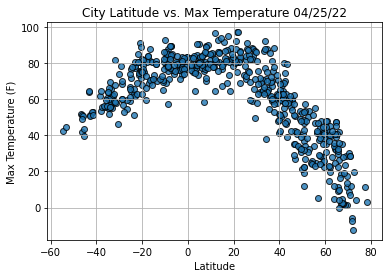

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

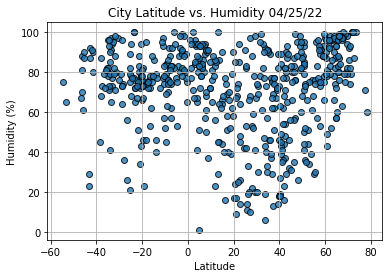

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

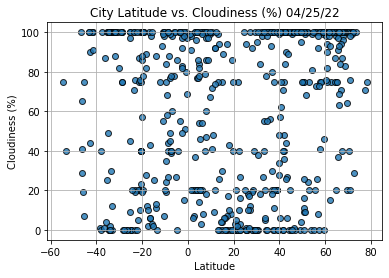

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

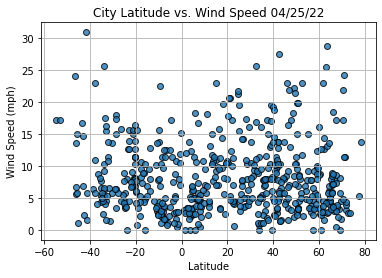

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

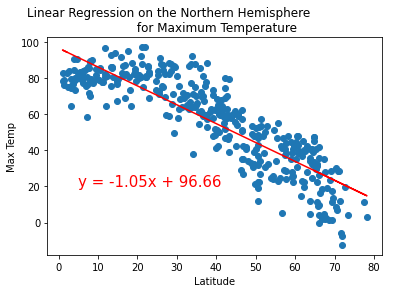

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       \n for Maximum Temperature', 'Max Temp',(5,20))

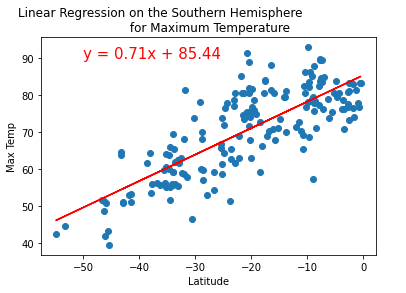

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Maximum Temperature', 'Max Temp',(-50,90))

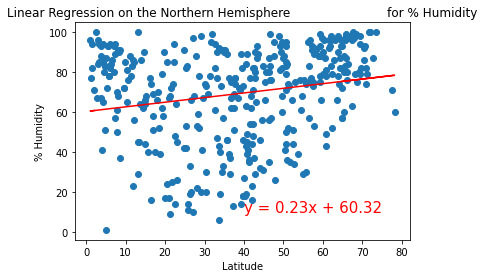

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

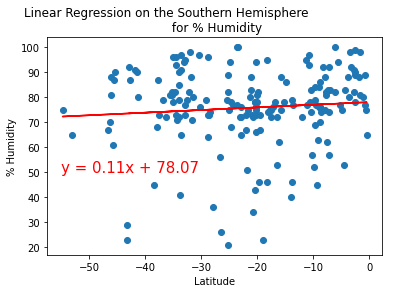

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Humidity', '% Humidity',(-55,50))


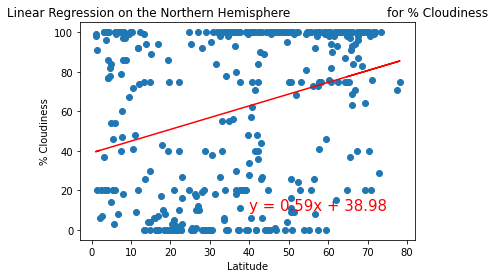

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

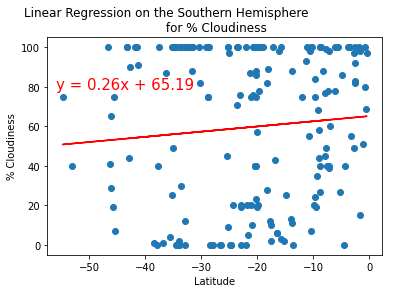

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(-56,79))


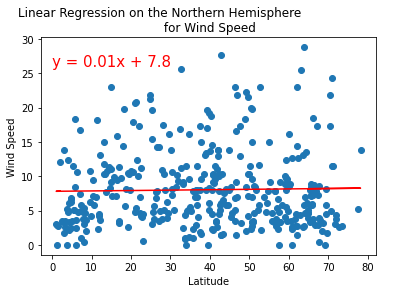

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(0,26))

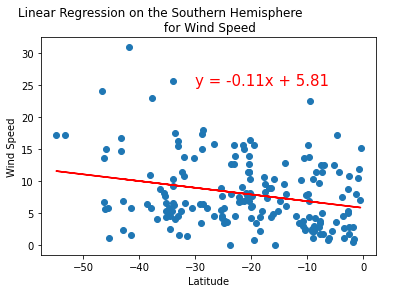

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(-30,25))